In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [2]:
image=cv2.imread('./sunflowers.jpg')[:,:,::-1]

In [3]:
def gaussianFilter(sigma,size):
    a=np.zeros((size,size))
    val=size>>1
    for i in range(size):
        for j in range(size):
            x,y=i-val,j-val
            a[i][j]=getGaussianValue(x,y,sigma)
    return a/np.sum(a)

In [4]:
def getGaussianValue(x,y,sigma):
    exp=-1*((x*x + y*y)/(2*sigma*sigma))
    val=np.power(np.e,exp)
    return val/(2*np.pi*sigma*sigma)

In [5]:
def differenceOfGaussian(sigma,size):
    a=gaussianFilter(sigma,size)
    b=gaussianFilter(2*sigma,size)
    return b-a

In [6]:
def laplacianFilter(sigma,size):
    a=np.zeros((size,size))
    val=size>>1
    for i in range(size):
        for j in range(size):
            x,y=i-val,j-val
            a[i][j]=getLaplacianValue(x,y,sigma)
    return a

In [7]:
def getLaplacianValue(x,y,sigma):
    exp=-1*((x*x + y*y)/(2*sigma*sigma))
    val=np.power(np.e,exp)
    return val*(x**2 + y**2 -2*sigma*sigma)

In [8]:
def padding(image,filtersize):
    imagesize=image.shape
    p=(filtersize-1)//2
    a=np.zeros((imagesize[0]+2*p,imagesize[1]+2*p))
    a[p:p+imagesize[0],p:p+imagesize[1]]=np.copy(image[:,:])
    return a

In [9]:
def convolution(image,mask):
    output=np.zeros(image.shape)
    padded=padding(image,mask.shape[0])
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            output[i][j]=np.sum(padded[i:i+mask.shape[0],j:j+mask.shape[1]]*mask)
    return output

In [10]:
def rgbToGray(image):
    out=0.30*image[:,:,0] + 0.59*image[:,:,1] + 0.11*image[:,:,2]
    return out

In [11]:
gray=rgbToGray(image)

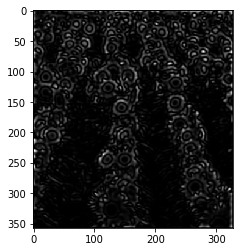

In [12]:
mask=laplacianFilter(2.5,15)
lap=convolution(gray,mask)
plt.imshow(lap*lap,cmap='gray')

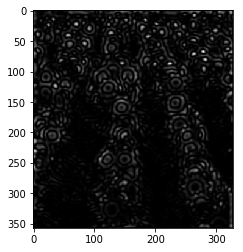

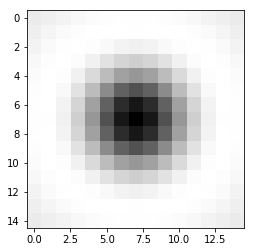

In [13]:
mask1=differenceOfGaussian(2.5,15)
gau=convolution(gray,mask1)
plt.imshow(gau**2,cmap='gray')
plt.show()
plt.imshow(mask1,cmap='gray')

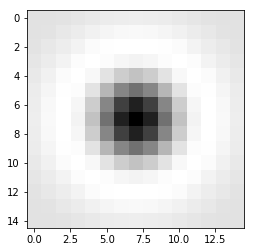

In [14]:
plt.imshow(mask,cmap='gray')

In [15]:
temp=lap*lap

In [16]:
temp=temp/temp.max()

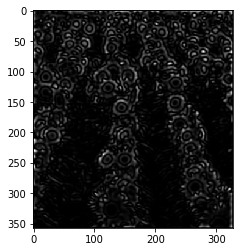

In [17]:
plt.imshow(temp,cmap='gray')

In [18]:
def nonMaxSupression(image,filtersize):
    padded=padding(image,filtersize)
    val=(filtersize-1)>>1
    output=np.zeros(padded.shape)
    for i in range(val,val+image.shape[0]):
        for j in range(val,val+image.shape[1]):
            value=np.max(padded[i-val:i+val+1,j-val:j+val+1])
            if value==padded[i,j]:
                output[i,j]=value
            else:
                output[i,j]=0
    return output[val:val+image.shape[0],val:val+image.shape[1]]


In [19]:
supp=nonMaxSupression(temp,15)

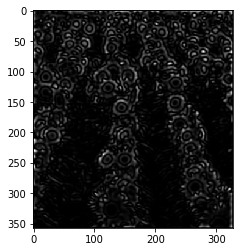

In [20]:
plt.imshow(temp,cmap='gray')

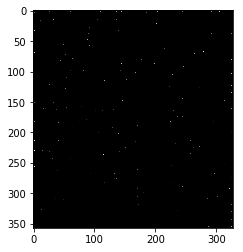

In [21]:
plt.imshow(supp,cmap='gray')

0
1
2
3
4
5


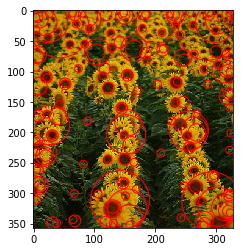

In [22]:
sigma=4.5
k=1.5
plt.imshow(image)
points=[]
sigmas=[]
for i in range(6):
    print(i)
    mask=laplacianFilter(sigma,int(np.ceil(sigma)*6 +1))
    lap=convolution(gray,mask)
    temp=lap*lap
    temp=temp/temp.max()
    supp=nonMaxSupression(temp,int(np.ceil(sigma)*6 +1))
    #plt.imshow(supp,cmap='gray')
    #plt.show()
    points.append(supp)
    sigmas.append(sigma)
    sigma*=k
points=np.array(points)
finalpoints=np.zeros_like(points)
finalpoints[points.max(0)==points]=points[points.max(0)==points]
finalpoints
for i in range(finalpoints.shape[0]):
    b=finalpoints[i]
    #print(b.shape)
    index=np.where(b>0)[::-1]
    #print(index)
    r=sigmas[i]*np.sqrt(2)
    for i in range(index[0].shape[0]):
        circle=plt.Circle((index[0][i],index[1][i]),r,color='r',fill=False)
        plt.gca().add_artist(circle)
plt.show()

0
1
2
3
4
5


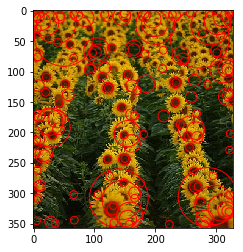

In [23]:
sigma=4.5
k=1.5
plt.imshow(image)
points=[]
sigmas=[]
for i in range(6):
    print(i)
    mask=differenceOfGaussian(sigma,int(np.ceil(sigma)*6 +1))
    lap=convolution(gray,mask)
    temp=lap*lap
    temp=temp/temp.max()
    supp=nonMaxSupression(temp,int(np.ceil(sigma)*6 +1))
    #plt.imshow(supp,cmap='gray')
    #plt.show()
    points.append(supp)
    sigmas.append(sigma)
    sigma*=k
points=np.array(points)
finalpoints=np.zeros_like(points)
finalpoints[points.max(0)==points]=points[points.max(0)==points]
finalpoints
for i in range(finalpoints.shape[0]):
    b=finalpoints[i]
    #print(b.shape)
    index=np.where(b>0)[::-1]
    #print(index)
    r=sigmas[i]*np.sqrt(2)
    for i in range(index[0].shape[0]):
        circle=plt.Circle((index[0][i],index[1][i]),r,color='r',fill=False)
        plt.gca().add_artist(circle)
plt.show()